In [5]:
%reload_ext autoreload
%autoreload 2
from experiments import experiment
from tqdm import tqdm
import numpy as np

In [6]:
distribution = [
    [
        ([0, 0, 0], 1/8),
        ([0, 0, 1], 1/8),
        ([0, 1, 0], 1/8),
        ([0, 1, 1], 1/8),
        ([1, 0, 0], 1/8),
        ([1, 0, 1], 1/8),
        ([1, 1, 0], 1/8),
        ([1, 1, 1], 1/8)
    ],
    [
        ([0, 0, 0], 0.21),
        ([0, 0, 1], 0.12),
        ([0, 1, 0], 0.04),
        ([0, 1, 1], 0.34),
        ([1, 0, 0], 0.1),
        ([1, 0, 1], 0.12),
        ([1, 1, 0], 0.02),
        ([1, 1, 1], 0.05)
    ],
    [
        ([0, 0, 0], 0.15),
        ([0, 0, 1], 0.1),
        ([0, 1, 0], 0.3),
        ([0, 1, 1], 0.1),
        ([1, 0, 0], 0.05),
        ([1, 0, 1], 0.1),
        ([1, 1, 0], 0.1),
        ([1, 1, 1], 0.1)
    ],
    [
        ([0, 0, 0], 0.15),
        ([0, 0, 1], 0.05),
        ([0, 1, 0], 0.3),
        ([0, 1, 1], 0.1),
        ([1, 0, 0], 0.1),
        ([1, 0, 1], 0.1),
        ([1, 1, 0], 0.1),
        ([1, 1, 1], 0.1)
    ],
    [
        ([0, 0, 0], 0.15),
        ([0, 0, 1], 0.3),
        ([0, 1, 0], 0.25),
        ([0, 1, 1], 0.05),
        ([1, 0, 0], 0.05),
        ([1, 0, 1], 0.05),
        ([1, 1, 0], 0.1),
        ([1, 1, 1], 0.05)
    ]
]

In [121]:
def get_score(dist):
  power_ump = []
  power_ump2 = []
  power_partial = []

  grid = [i for i in range(30,300+1, 5)]

  for n in tqdm(grid):
    while True:
      try:
        cur_ump, cur_ump2, cur_partial = experiment(dist, n, 10000, 0.05)
        power_ump.append(cur_ump)
        power_ump2.append(cur_ump2)
        power_partial.append(cur_partial)
        break
      except Exception:
        print('GG')
  return (power_ump, power_ump2, power_partial)

In [122]:
# results = []
# for dist in distribution:
#     results.append(get_score(dist))

In [124]:
dist = [
        ([0, 0, 0], 0.15),
        ([0, 0, 1], 0.1),
        ([0, 1, 0], 0.1),
        ([0, 1, 1], 0.15),
        ([1, 0, 0], 0.1),
        ([1, 0, 1], 0.15),
        ([1, 1, 0], 0.15),
        ([1, 1, 1], 0.1)
    ]
power_ump,power_ump2,power_partial=get_score(dist)
results.append((power_ump,power_ump2,power_partial))

  0%|          | 0/55 [00:00<?, ?it/s]

100%|██████████| 55/55 [56:05<00:00, 61.20s/it] 


In [125]:
import pickle

with open('data.pickle', 'wb') as f:
    pickle.dump(results, f, pickle.HIGHEST_PROTOCOL)

In [135]:
grid = [i for i in range(30,300+1, 5)]
power_ump,power_ump2,power_partial=results[0]

In [136]:
# def get_odd(x):
#     new_x=[]
#     for i in range(len(x)):
#         if i%2==0:
#             new_x.append(x[i])
#     return new_x
# power_ump = get_odd(power_ump)
# power_ump2 = get_odd(power_ump2)
# power_partial = get_odd(power_partial)
# grid = get_odd(grid)

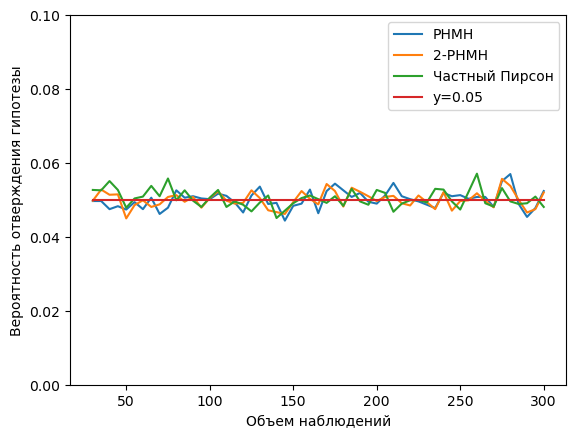

In [139]:
import matplotlib.pyplot as plt
plt.plot(grid, power_ump, label='РНМН')
plt.plot(grid, power_ump2, label='2-РНМН')
plt.plot(grid, power_partial, label='Частный Пирсон')
plt.plot([30,300],[0.05,0.05], label='y=0.05')
plt.ylim(0, 0.1)
plt.xlabel('Объем наблюдений')
plt.ylabel('Вероятность отвержения гипотезы')
plt.legend()
plt.savefig('graph1.png', dpi=300)
plt.show()